Problem statement

* To create an automated model for the medical insurance company which tells what will be the insurace cost of a person will be



In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df.shape

(1338, 7)

In [36]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [38]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-41-e6d57f5fa822>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df,palette='pastel')


<Axes: xlabel='sex', ylabel='count'>

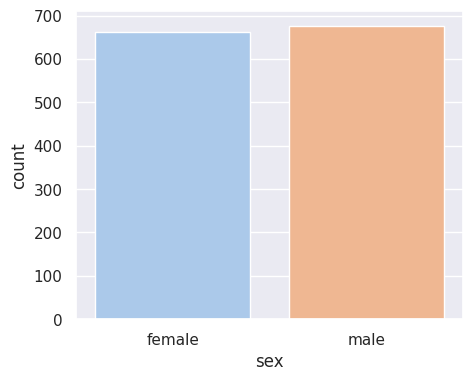

In [41]:
plt.figure(figsize=(5,4))
sns.countplot(x='sex',data=df,palette='pastel')

<Axes: xlabel='smoker', ylabel='count'>

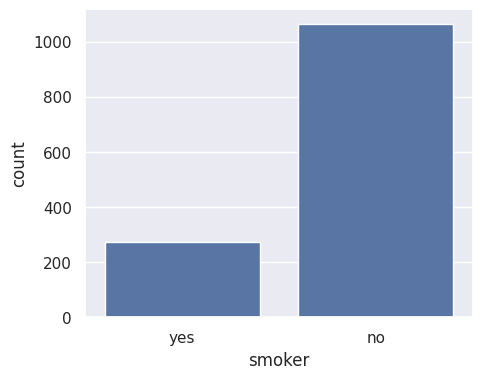

In [44]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['smoker'])

In [45]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Axes: xlabel='region', ylabel='count'>

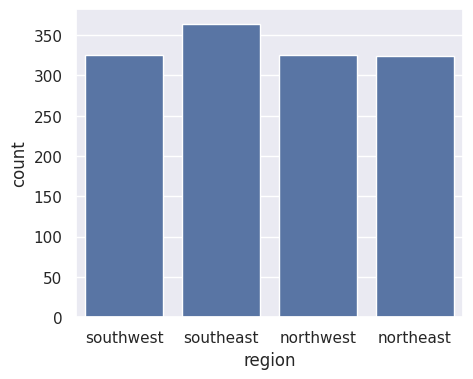

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['region'])

<ipython-input-47-ecc9de8aeb95>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


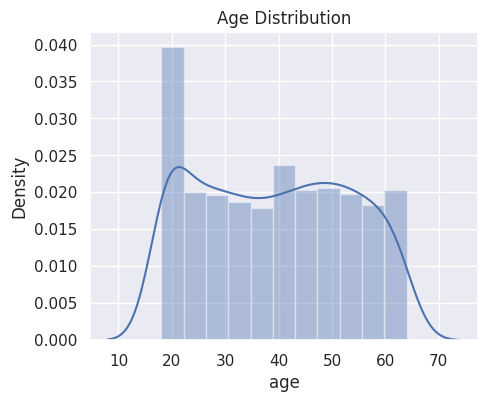

In [47]:
plt.figure(figsize=(5,4))
sns.set()
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

<ipython-input-48-8c5aabb3728a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


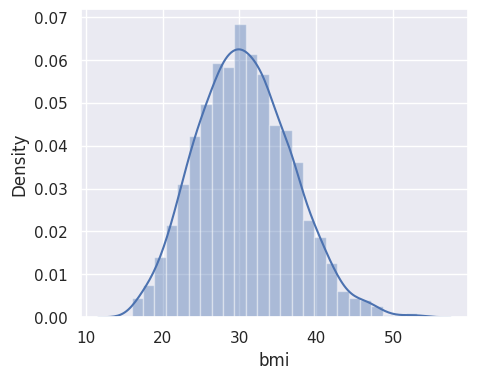

In [48]:
plt.figure(figsize=(5,4))
sns.distplot(df['bmi'])
plt.show()

In [49]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<Axes: xlabel='smoker', ylabel='charges'>

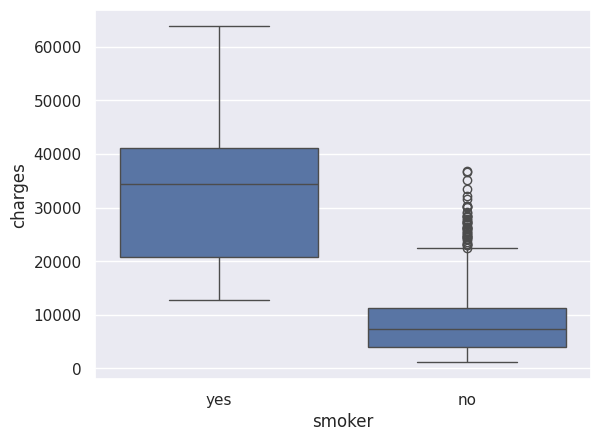

In [50]:
sns.boxplot(x='smoker',y='charges',data=df)

<Axes: xlabel='bmi', ylabel='charges'>

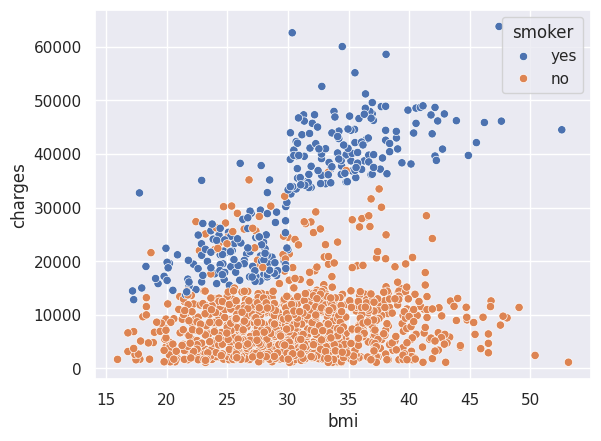

In [51]:
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df)

<ipython-input-52-fc6639f6ca1d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

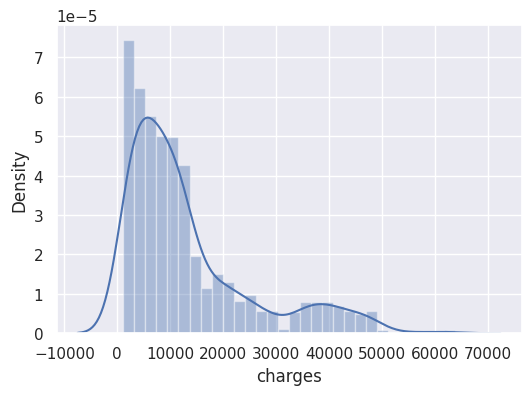

In [52]:
plt.figure(figsize=(6,4))
sns.distplot(df['charges'])

In [53]:
#Encoding sex
df.replace({'sex':{'male':1,'female':0}},inplace=True)
df.head()

<ipython-input-53-7b9e0d28df6e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':1,'female':0}},inplace=True)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [54]:
#Encoding region
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
df.head()

<ipython-input-54-a7953700f657>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,1,16884.92400
1,18,1,33.770,1,no,0,1725.55230
2,28,1,33.000,3,no,0,4449.46200
3,33,1,22.705,0,no,3,21984.47061
4,32,1,28.880,0,no,3,3866.85520


In [55]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.head()

<ipython-input-55-06dac6f5b42d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}},inplace=True)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


In [56]:
X=df.drop('charges',axis=1)
y =df['charges']

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,0
2,28,1,33.000,3,1,0
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,2
1335,18,0,36.850,0,1,0
1336,21,0,25.800,0,1,1


In [60]:
#Train Test Split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.15, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1137, 6)
(1137,)
(201, 6)
(201,)


In [61]:
#Model Implementation

reg=LinearRegression()


In [63]:
#Model fitting
reg.fit(X_train,y_train)

LinearRegression()

In [66]:
#Prediction
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [76]:
#Model Evaluation
#Train Score
score_train= round(metrics.r2_score(y_train,y_train_pred),4)
print(f"Train data r2_score: {score_train}")

#Test Score
score_test= round(metrics.r2_score(y_test,y_test_pred),4)
print(f'Test data r2_score: {score_test}')

Train data r2_score: 0.7417
Test data r2_score: 0.7962


In [84]:
#Lets try Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [90]:
param_distributions= {'alpha':[0.01,0.1,1,10]}
ridge_cv = RandomizedSearchCV(Ridge(),param_distributions,cv=5,n_iter=4)
ridge_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=4,
                   param_distributions={'alpha': [0.01, 0.1, 1, 10]})

In [91]:
ridge_cv.best_params_

{'alpha': 1}

In [93]:
# Model Fitting Ridge
#Model Implementation

reg1=Ridge(alpha=1)

reg1.fit(X_train,y_train)

#Prediction
y_train_pred = reg1.predict(X_train)
y_test_pred = reg1.predict(X_test)


In [94]:
#Model Evaluation
#Train Score
score_train_ridge= round(metrics.r2_score(y_train,y_train_pred),4)
print(f"Train data r2_score: {score_train_ridge}")

#Test Score
score_test_ridge= round(metrics.r2_score(y_test,y_test_pred),4)
print(f'Test data r2_score: {score_test_ridge}')

# this also gave the same R2 score

Train data r2_score: 0.7417
Test data r2_score: 0.796


<ipython-input-95-cd25e201f61c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

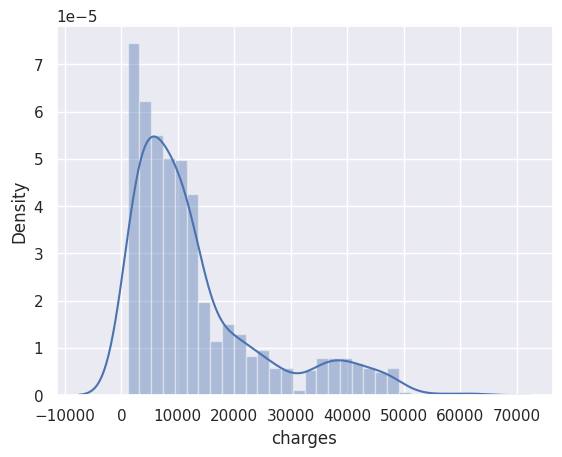

In [95]:
sns.distplot(df['charges'])

In [96]:
# as its not normall distibuted (left skewed),we can try log transformations
y_train_log= np.log(y_train)
y_test_log= np.log(y_test)

In [97]:
#model implementation after log transformation

reg2=LinearRegression()

reg2.fit(X_train,y_train_log)

#Prediction
y_train_pred_log = reg2.predict(X_train)
y_train_pred=np.exp(y_train_pred_log)


y_test_pred_log = reg2.predict(X_test)
y_test_pred=np.exp(y_test_pred_log)

In [105]:
#Model Evaluation
#Train Score
score_train_log= round(metrics.r2_score(y_train_log,y_train_pred_log),4)
print(f"Train data r2_score: {score_train_log}")

#Test Score
score_test_log= round(metrics.r2_score(y_test_log,y_test_pred_log),4)
print(f'Test data r2_score: {score_test_log}')

# the model performs better after applying log transformations

Train data r2_score: 0.7573
Test data r2_score: 0.8101


Before: The original target (charges) had high variance and skewed distribution (some very large values).
After: Taking log(y) reduced skewness and made it easier for the model to learn relationships.
✅ Better predictions on log(y) → Higher R² in log scale (80%).

In [106]:

#Model Evaluation
#Train Score
score_train_log= round(metrics.r2_score(np.exp(y_train_log),y_train_pred),4)
print(f"Train data r2_score: {score_train_log}")

#Test Score
score_test_log= round(metrics.r2_score(np.exp(y_test_log),y_test_pred),4)
print(f'Test data r2_score: {score_test_log}')

Train data r2_score: 0.5187
Test data r2_score: 0.5209


Log transformation reduces the impact of outliers.

Applying np.exp() brings back extreme values, increasing errors.


In [ ]:
#So predictions after applying log transformations will be in log scale
# so use np.exp()for predictions

As the Log transformations did'nt increase the R2 score very significantly , we can use LinearRegression before log transformation in the system.